importing libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

read file

In [ ]:
df=pd.read_csv(r'C:\Users\KIIT\1803045.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46449 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [ ]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200020431,DEC associates,2020-03-02 00:00:00,2020.0,1.930548e+09,2020-02-20,20200220,20200220,20200310.0,USD,RV,1.0,NaN,3492.90,20200216.0,NAM4,1.930548e+09,0
1,U001,0200078795,H T H in,2019-04-10 00:00:00,2019.0,1.929042e+09,2019-03-27,20190327,20190327,20190411.0,USD,RV,1.0,NaN,4772.38,20190327.0,NAA8,1.929042e+09,0
2,U001,0200769623,WAL-MAR systems,2019-09-03 00:00:00,2019.0,1.929767e+09,2019-08-21,20190820,20190821,20190905.0,USD,RV,1.0,NaN,15894.82,20190821.0,NAH4,1.929767e+09,0
3,U001,0200769623,WAL-MAR corporation,2020-02-12 00:00:00,2020.0,1.930460e+09,2020-02-01,20200130,20200201,20200216.0,USD,RV,1.0,NaN,55317.82,20200201.0,NAH4,1.930460e+09,0
4,U001,200769623,WAL-MAR associates,2019-03-18 00:00:00,2019.0,1.928913e+09,2019-03-07,20190306,20190307,20190322.0,USD,RV,1.0,NaN,50710.15,20190307.0,NAH4,1.928913e+09,0


checking for null values

In [ ]:
for columns in df.columns:
  print(columns,": null values are ",df[columns].isnull().sum())

business_code : null values are  0
cust_number : null values are  0
name_customer : null values are  0
clear_date : null values are  3551
buisness_year : null values are  0
doc_id : null values are  0
posting_date : null values are  0
document_create_date : null values are  0
document_create_date.1 : null values are  0
due_in_date : null values are  0
invoice_currency : null values are  0
document type : null values are  0
posting_id : null values are  0
area_business : null values are  50000
total_open_amount : null values are  0
baseline_create_date : null values are  0
cust_payment_terms : null values are  0
invoice_id : null values are  7
isOpen : null values are  0


removing null value elements

In [ ]:
df_clear_date=df[df['clear_date'].isnull()]
df=df[df['clear_date'].notnull()]

In [ ]:
df_clear_date.shape

(3551, 19)

In [ ]:
df.shape

(46449, 19)

In [ ]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             46449
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [ ]:
len(df['invoice_id'].unique())

46443

comparing doc_id and invoice_id values

In [ ]:
df[df['doc_id']==df['invoice_id']].shape

(46442, 19)

In [ ]:
df.loc[1:5,'cust_number':'name_customer']

,cust_number,name_customer
1,0200078795,H T H in
2,0200769623,WAL-MAR systems
3,0200769623,WAL-MAR corporation
4,200769623,WAL-MAR associates
5,0200769623,WAL-MAR trust


In [ ]:
df['clear_date'].isnull().sum()

0

In [ ]:
df['area_business'].isnull().sum()

46449

converting all dates to datetime format %Y%m%d

In [ ]:
data=df
def convertIntoDateTime(x):
    list1 = [str(y) for y in x]
    s=pd.to_datetime(list1,format='%Y%m%d')
    return s

data[["document_create_date","document_create_date.1","baseline_create_date","due_in_date"]] = data[["document_create_date","document_create_date.1","baseline_create_date","due_in_date"]].apply(convertIntoDateTime) 

In [ ]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [ ]:
df=data
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200020431,DEC associates,2020-03-02,2020.0,1.930548e+09,2020-02-20,2020-02-20,2020-02-20,2020-03-10,USD,RV,1.0,NaN,3492.90,2020-02-16,NAM4,1.930548e+09,0
1,U001,0200078795,H T H in,2019-04-10,2019.0,1.929042e+09,2019-03-27,2019-03-27,2019-03-27,2019-04-11,USD,RV,1.0,NaN,4772.38,2019-03-27,NAA8,1.929042e+09,0
2,U001,0200769623,WAL-MAR systems,2019-09-03,2019.0,1.929767e+09,2019-08-21,2019-08-20,2019-08-21,2019-09-05,USD,RV,1.0,NaN,15894.82,2019-08-21,NAH4,1.929767e+09,0
3,U001,0200769623,WAL-MAR corporation,2020-02-12,2020.0,1.930460e+09,2020-02-01,2020-01-30,2020-02-01,2020-02-16,USD,RV,1.0,NaN,55317.82,2020-02-01,NAH4,1.930460e+09,0
4,U001,200769623,WAL-MAR associates,2019-03-18,2019.0,1.928913e+09,2019-03-07,2019-03-06,2019-03-07,2019-03-22,USD,RV,1.0,NaN,50710.15,2019-03-07,NAH4,1.928913e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46444,U001,CCU013,KRAFT F us,2019-03-01,2019.0,1.928636e+09,2019-01-20,2019-01-16,2019-01-20,2019-01-20,USD,RV,1.0,NaN,7465.45,2019-01-20,NAX2,1.928636e+09,0
46445,U001,0200759878,SA in,2019-03-11,2019.0,1.928831e+09,2019-02-22,2019-02-20,2019-02-22,2019-03-09,USD,RV,1.0,NaN,29096.77,2019-02-22,NAH4,1.928831e+09,0
46446,U001,0100031704,DELHAIZE corporation,2019-02-19,2019.0,1.928730e+09,2019-02-03,2019-02-03,2019-02-03,2019-02-18,USD,RV,1.0,NaN,105516.06,2019-02-03,NAA8,1.928730e+09,0
46447,U001,0200707822,PUBLI corp,2019-09-19,2019.0,1.929822e+09,2019-09-04,2019-09-04,2019-09-04,2019-09-19,USD,RV,1.0,NaN,21512.99,2019-09-04,NAA8,1.929822e+09,0


modifying customer number values

In [ ]:
a=[x for x in df['cust_number']]

In [ ]:
for i in range(len(a)):
  if(len(a[i])==9):
    a[i]='0'+a[i]
  if(len(a[i])==6 or len(a[i])==4):
    s=a[i]
    a[i]=s[2:]
  if(len(a[i])==4):
    s=a[i]
    a[i]=s[2:]

In [ ]:
b=[int(i) for i in a]

In [ ]:
b

[200020431,
 200078795,
 200769623,
 200769623,
 200769623,
 200769623,
 200550425,
 200900909,
 200769623,
 200744019,
 200974851,
 200727272,
 200769623,
 200769623,
 2,
 200769623,
 200782001,
 200744707,
 200148860,
 200769623,
 200726979,
 200705742,
 200759878,
 200769623,
 200769623,
 200780383,
 200458131,
 140104409,
 200762301,
 200759878,
 200704045,
 200936373,
 200776463,
 100001196,
 200020431,
 200769623,
 200769623,
 200732755,
 200782669,
 200739006,
 200707822,
 200769623,
 200707822,
 200769623,
 200769623,
 200762950,
 200148860,
 200772595,
 140106209,
 200704858,
 200418007,
 140105686,
 200706844,
 200186937,
 200794332,
 200900909,
 200865666,
 200762301,
 200726979,
 200705089,
 200974851,
 200726979,
 200982290,
 200900909,
 200769623,
 200486270,
 100035709,
 200526831,
 140104440,
 200762301,
 200762301,
 200769623,
 200769623,
 2,
 200718130,
 200769623,
 200759878,
 200974851,
 100031704,
 200769623,
 140103592,
 200769623,
 200705742,
 200793513,
 2,
 200

In [ ]:
df['cust_number']=b

checking for duplicates

In [ ]:
df[df['name_customer']=='WEGMAN corp']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3314,U001,200711029,WEGMAN corp,2019-04-03,2019.0,1.928990e+09,2019-03-19,2019-03-19,2019-03-19,2019-04-03,USD,RV,1.0,NaN,86275.29,2019-03-19,NAA8,1.928990e+09,0
7514,U001,200711029,WEGMAN corp,2019-11-12,2019.0,1.930054e+09,2019-10-25,2019-10-26,2019-10-25,2019-11-09,USD,RV,1.0,NaN,18180.33,2019-10-25,NAA8,1.930054e+09,0
18665,U001,200711029,WEGMAN corp,2019-05-28,2019.0,1.929305e+09,2019-05-13,2019-05-13,2019-05-13,2019-05-28,USD,RV,1.0,NaN,31201.49,2019-05-13,NAA8,1.929305e+09,0
36190,U001,200711029,WEGMAN corp,2020-02-10,2020.0,1.930441e+09,2020-01-24,2020-01-25,2020-01-24,2020-02-08,USD,RV,1.0,NaN,62648.77,2020-01-24,NAA8,1.930441e+09,0
42664,U001,200711029,WEGMAN corp,2019-12-26,2019.0,1.930261e+09,2019-12-11,2019-12-11,2019-12-11,2019-12-26,USD,RV,1.0,NaN,24207.72,2019-12-11,NAA8,1.930261e+09,0
43699,U001,200711029,WEGMAN corp,2019-12-30,2019.0,1.930281e+09,2019-12-13,2019-12-14,2019-12-13,2019-12-28,USD,RV,1.0,NaN,71313.95,2019-12-13,NAA8,1.930281e+09,0
44691,U001,200711029,WEGMAN corp,2019-11-12,2019.0,1.930036e+09,2019-10-20,2019-10-21,2019-10-20,2019-11-04,USD,RV,1.0,NaN,7634.56,2019-10-20,NAA8,1.930036e+09,0
45679,U001,200711029,WEGMAN corp,2019-03-01,2019.0,1.928780e+09,2019-02-14,2019-02-11,2019-02-14,2019-03-01,USD,RV,1.0,NaN,4317.04,2019-02-14,NAA8,1.928780e+09,0


In [ ]:
len(df['cust_number'].unique())

1085

removing all duplicate values

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(46449, 19)

In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200020431,DEC associates,2020-03-02,2020.0,1.930548e+09,2020-02-20,2020-02-20,2020-02-20,2020-03-10,USD,RV,1.0,NaN,3492.90,2020-02-16,NAM4,1.930548e+09,0
1,U001,200078795,H T H in,2019-04-10,2019.0,1.929042e+09,2019-03-27,2019-03-27,2019-03-27,2019-04-11,USD,RV,1.0,NaN,4772.38,2019-03-27,NAA8,1.929042e+09,0
2,U001,200769623,WAL-MAR systems,2019-09-03,2019.0,1.929767e+09,2019-08-21,2019-08-20,2019-08-21,2019-09-05,USD,RV,1.0,NaN,15894.82,2019-08-21,NAH4,1.929767e+09,0
3,U001,200769623,WAL-MAR corporation,2020-02-12,2020.0,1.930460e+09,2020-02-01,2020-01-30,2020-02-01,2020-02-16,USD,RV,1.0,NaN,55317.82,2020-02-01,NAH4,1.930460e+09,0
4,U001,200769623,WAL-MAR associates,2019-03-18,2019.0,1.928913e+09,2019-03-07,2019-03-06,2019-03-07,2019-03-22,USD,RV,1.0,NaN,50710.15,2019-03-07,NAH4,1.928913e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46444,U001,13,KRAFT F us,2019-03-01,2019.0,1.928636e+09,2019-01-20,2019-01-16,2019-01-20,2019-01-20,USD,RV,1.0,NaN,7465.45,2019-01-20,NAX2,1.928636e+09,0
46445,U001,200759878,SA in,2019-03-11,2019.0,1.928831e+09,2019-02-22,2019-02-20,2019-02-22,2019-03-09,USD,RV,1.0,NaN,29096.77,2019-02-22,NAH4,1.928831e+09,0
46446,U001,100031704,DELHAIZE corporation,2019-02-19,2019.0,1.928730e+09,2019-02-03,2019-02-03,2019-02-03,2019-02-18,USD,RV,1.0,NaN,105516.06,2019-02-03,NAA8,1.928730e+09,0
46447,U001,200707822,PUBLI corp,2019-09-19,2019.0,1.929822e+09,2019-09-04,2019-09-04,2019-09-04,2019-09-19,USD,RV,1.0,NaN,21512.99,2019-09-04,NAA8,1.929822e+09,0


adding a new column 'delay'

In [ ]:
df['delay']=(pd.to_datetime(df['clear_date'])-pd.to_datetime(df['due_in_date'])).dt.days

adding a new column 'daystosettle'

In [ ]:
df['daystosettle']=(pd.to_datetime(df['due_in_date'])-pd.to_datetime(df['document_create_date.1'])).dt.days

In [ ]:
df['delay'][0]

-8

checking if customer is late or on time or before time  and making a seperate column for so

In [ ]:
for x in range(len(df['delay'])):
  if(df['delay'][x]<0):
    df['delay'][x]=0

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['Late'] = df['delay'].apply(lambda x: 1 if x >0 else 0)

creating labels to encode data

In [ ]:
labels = df['cust_number'].astype('category').cat.categories.tolist()

In [ ]:
len(labels)

1085

In [ ]:
replace_map_comp = {'cust_number' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [ ]:
lulli=df.copy()

In [ ]:
df['cust_number']=a

In [ ]:
labels = df['cust_number'].astype('category').cat.categories.tolist()

In [ ]:
len(labels)

1085

In [ ]:
replace_map_comp = {'cust_number' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [ ]:
df.replace(replace_map_comp, inplace=True)

In [ ]:
df['cust_number'].nunique()

1085

implementing feature engineering operations on the data 

In [ ]:
df[df['document type']=='X2'].delay.mean()

89.0

In [ ]:
df['invoice_currency'].value_counts()

USD    42791
CAD     3658
Name: invoice_currency, dtype: int64

In [ ]:
df.groupby('invoice_currency')['delay'].max()

invoice_currency
CAD    253
USD    282
Name: delay, dtype: int64

In [ ]:
df.groupby('cust_payment_terms')['delay'].mean()

cust_payment_terms
90M7     0.000000
B052     0.000000
BR12    11.000000
BR56     4.000000
C106     2.388889
          ...    
NAWM     4.000000
NAWN     4.522124
NAWP     0.000000
NAWU     1.299270
NAX2    43.581184
Name: delay, Length: 69, dtype: float64

In [ ]:
df.groupby('business_code')['delay'].mean()

business_code
CA02     6.762647
U001     2.310491
U002     4.371795
U005    16.454545
U007     4.000000
U013    11.082077
Name: delay, dtype: float64

In [ ]:
df1 = df[df['delay']>0].copy()

In [ ]:
df2 = pd.DataFrame(df1.groupby(['cust_number'], axis=0, as_index=False)['delay'].count())

In [ ]:
df2.columns = (['cust_number','repeatCust'])

In [ ]:
df2

,cust_number,repeatCust
0,1,80
1,2,30
2,3,1
3,4,1
4,5,6
...,...,...
798,1081,10
799,1082,9
800,1083,24
801,1084,6


In [ ]:
df3 = pd.merge(df, df2, how='left', on='cust_number')

In [ ]:
df3['repeatCust'].fillna(0, inplace=True)

In [ ]:
df=df3

In [ ]:
df['countlate']=df.Late.eq(1).groupby(df.cust_number).apply(lambda x : x.cumsum().shift().fillna(0)).astype(int)

In [ ]:
x=['due_in_date','invoice_currency','name_customer','document_create_date','document_create_date.1','clear_date','doc_id','invoice_id','posting_date','posting_id','doc_id','document type','baseline_create_date','area_business','isOpen']
df.drop(x,axis=1,inplace=True)

In [ ]:
labels = df['cust_payment_terms'].astype('category').cat.categories.tolist()
replace_map_comp = {'cust_payment_terms' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df.replace(replace_map_comp, inplace=True)

In [ ]:
labels = df['business_code'].astype('category').cat.categories.tolist()
replace_map_comp = {'business_code' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df.replace(replace_map_comp, inplace=True)

In [ ]:
df.head()

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,delay,daystosettle,Late,repeatCust,countlate
0,2,474,2020.0,3492.90,39,0,19,0,45.0,0
1,2,500,2019.0,4772.38,21,0,15,0,24.0,0
2,2,901,2019.0,15894.82,35,0,15,0,1972.0,0
3,2,901,2020.0,55317.82,35,0,15,0,1972.0,0
4,2,901,2019.0,50710.15,35,0,15,0,1972.0,0


preparing the final dataset to use split test upon

In [ ]:
cat_feats = ['business_code']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46449 entries, 0 to 46448
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cust_number         46449 non-null  int64  
 1   buisness_year       46449 non-null  float64
 2   total_open_amount   46449 non-null  float64
 3   cust_payment_terms  46449 non-null  int64  
 4   delay               46449 non-null  int64  
 5   daystosettle        46449 non-null  int64  
 6   Late                46449 non-null  int64  
 7   repeatCust          46449 non-null  float64
 8   countlate           46449 non-null  int32  
 9   business_code_2     46449 non-null  uint8  
 10  business_code_3     46449 non-null  uint8  
 11  business_code_4     46449 non-null  uint8  
 12  business_code_5     46449 non-null  uint8  
 13  business_code_6     46449 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), uint8(5)
memory usage: 4.6 MB


x is the independant variables(features)
y is the target (dependant) variable (delay)

In [ ]:
features=['business_code','cust_number','total_open_amount','cust_payment_terms','Late','repeatCust','countlate','daystosettle']
X = df[features]
y = df['delay']

In [ ]:
X

,business_code,cust_number,total_open_amount,cust_payment_terms,Late,repeatCust,countlate,daystosettle
0,2,474,3492.90,39,0,45.0,0,19
1,2,500,4772.38,21,0,24.0,0,15
2,2,901,15894.82,35,0,1972.0,0,15
3,2,901,55317.82,35,0,1972.0,0,15
4,2,901,50710.15,35,0,1972.0,0,15
...,...,...,...,...,...,...,...,...
46444,2,1080,7465.45,69,1,649.0,648,0
46445,2,878,29096.77,35,1,981.0,980,15
46446,2,136,105516.06,21,1,276.0,275,15
46447,2,755,21512.99,21,0,244.0,244,15


applying the split test operations using linear regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,shuffle=False,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32514, 8), (13935, 8), (32514,), (13935,))

In [ ]:
linear=LinearRegression()

In [ ]:
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred1 = linear.predict(X_test)

In [ ]:
linear_accuracy = round(linear.score(X_train,y_train)*100,2)
print(round(linear_accuracy,2),'%')

21.37 %


In [ ]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred1))

3.439178455785106


In [ ]:
y_pred1

array([ 5.66524541, -1.00911737, -0.36325749, ...,  7.10532333,
       -0.60241837,  5.64691791])

In [ ]:
GBR_model = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [ ]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [ ]:
y_pred2 = GBR_model.predict(X_test)

In [ ]:
GBR_model_accuracy = round(GBR_model.score(X_train,y_train)*100,2)
print(round(GBR_model_accuracy,2),'%')

63.26 %


In [ ]:
y_pred2=y_pred2.round()

In [ ]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y_pred1=pd.DataFrame(y_pred1)

In [ ]:
y_pred2.max()

175.0

In [ ]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred2))

1.9127377108001435


plotting the values on a  graph

In [ ]:
y = pd.concat([y_test,y_pred1],axis=1)
y.columns = ('act','pred')

y

,act,pred
0,NaN,5.665245
1,NaN,-1.009117
2,NaN,-0.363257
3,NaN,-1.702802
4,NaN,5.713464
...,...,...
46444,40.0,NaN
46445,2.0,NaN
46446,1.0,NaN
46447,0.0,NaN


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


<AxesSubplot:xlabel='act_bin'>

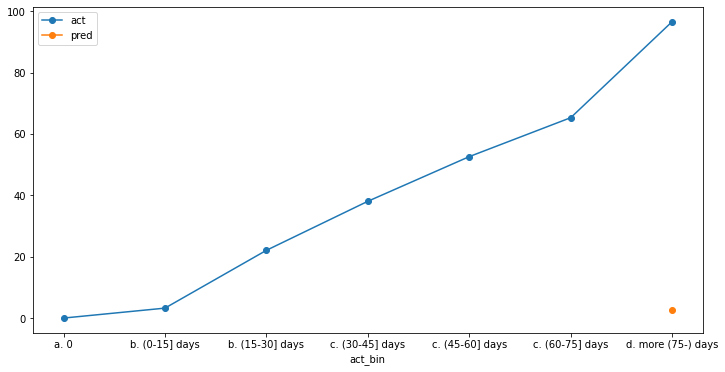

In [ ]:
def act_decile (x):
    if x == 0: return "a. 0"
    elif x <= 15: return "b. (0-15] days"
    elif x <= 30: return "b. (15-30] days"
    elif x <= 45: return "c. (30-45] days"
    elif x <= 60: return "c. (45-60] days"
    elif x <= 75: return "c. (60-75] days"
    else: return "d. more (75-) days"
y['act_bin'] = y['act'].apply(act_decile)
y['pred'].dropna(inplace=True)

temp = pd.DataFrame(y.groupby(['act_bin'], axis=0, as_index=False)['act','pred'].mean())
temp.index = temp['act_bin']
temp.plot(marker='o',figsize=(12,6))